In [4]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt

In [2]:
#punto 1. Calcula el valor absoluto de la multiplicación entre el valor maximo de X y el valor minimo de Y
def una_funcion(x,y):
    algo = x[0]
    otra_cosa = y[0]
    for i in x:
        if i > algo:
            algo = i
    for j in y:
        if j < otra_cosa:
            otra_cosa = j
    un_valor = algo*otra_cosa
    factor = 0 - 1
    if un_valor < 0:
        un_valor = factor*un_valor
    return(un_valor)

In [3]:
x = [1, 10, 30, 50, 200, 80, 90, 2,3,4,5]
y = [5, -1, -3, -200, -5, -70, -80, 4, -50, -2,-3]

In [4]:
una_funcion(x,y)

40000

In [5]:
x = [3]
y = [-3]

In [6]:
una_funcion(x,y)

9

In [7]:
x = [2, 4, 1, 1000]
y = [0, -2, -3]

In [8]:
una_funcion(x,y)

3000

In [9]:
#punto 2: indica cúantos elementos en el vector tienen valor absoluto
#mayor al promedio de los elementos del vector
class vector:
    def __init__(self, mi_vector):
        self.mi_vector = mi_vector
    def un_metodo(self):
                 import numpy as np
                 referencia1 = np.mean(self.mi_vector)
                 algo = 0
                 otra_cosa = []
                 for i in range(len(self.mi_vector)):
                     if self.mi_vector[i] > 0:
                         otra_cosa.append(self.mi_vector[i])
                     else:
                         otra_cosa.append(-1*self.mi_vector[i])
                 for j in otra_cosa:
                     if j > referencia1:
                        algo = algo+1
                 return(algo)


In [10]:
x = vector([-2,-6,29])

In [11]:
x.un_metodo()

1

In [12]:
#Punto 3. Verdadero
x = [1,2,5,7,8,4]
y = [2,8,4,3,10,8]
pd.DataFrame({"x":x,"y":y})

,x,y
0,1,2
1,2,8
2,5,4
3,7,3
4,8,10
5,4,8


In [13]:
#Punto 4: verdadero
data = pd.read_csv("regression_auto.csv")

In [14]:
data.head()

,make,mpg,weight,weight1,price,foreign,repairs,length
0,AMC,22,2930,2.93,4099,0,3,186
1,AMC,17,3350,3.35,4749,0,3,173
2,AMC,22,2640,2.64,3799,0,3,168
3,Audi,17,2830,2.83,9690,1,5,189
4,Audi,23,2070,2.07,6295,1,3,174


In [15]:
data.iloc[17,0]

'Chevrolet'

In [16]:
data.iloc[16,7]

163

In [17]:
#punto 5. R2 ajustado 0.631
data = pd.read_csv("regression_auto.csv")


In [18]:
modelo_OLS = sm.OLS(data["mpg"], sm.add_constant(data[["weight1","price", "foreign"]]))
results_OLS = modelo_OLS.fit()
print(results_OLS.summary())

                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.675
Model:                            OLS   Adj. R-squared:                  0.631
Method:                 Least Squares   F-statistic:                     15.25
Date:                Wed, 13 May 2020   Prob (F-statistic):           1.37e-05
Time:                        13:43:15   Log-Likelihood:                -62.315
No. Observations:                  26   AIC:                             132.6
Df Residuals:                      22   BIC:                             137.7
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         42.1662      4.265      9.887      0.0

In [19]:
#punto 6. Falso: la asimetria: 1.32 < 5.08 el estadstico breuschpagan
import statsmodels.stats.api as sms

In [20]:
residuos_OLS_1 = results_OLS.resid
explicativas = data[["weight1","price", "foreign"]]


In [21]:
#test breuch pagan, heterocedasticidad
explicativas_1 = results_OLS.model.exog
sms.het_breuschpagan(residuos_OLS_1, explicativas_1)

(5.0812393650830305,
 0.16594414152184284,
 1.7812920497981874,
 0.18013479720046788)

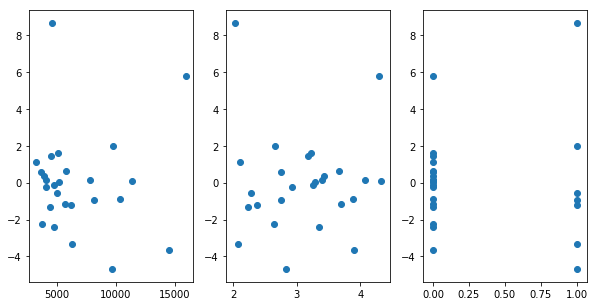

In [22]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize = (10,5))
ax1.scatter(data["price"], residuos_OLS_1)
ax2.scatter(data["weight1"], residuos_OLS_1)
ax3.scatter(data["foreign"], residuos_OLS_1)
plt.show()

In [23]:
#supuesto de normalidad. Jarque BEra, Anderson-Darling
resultadostest = sms.jarque_bera(residuos_OLS_1)
Nombres = ["Estadistico_JB", "pvalue_JB", "Asimetria", "curtosis"]
pd.Series(resultadostest, index = Nombres)
#ho: nomralidad en los residuos, p > 0,05 no se rechaza la ho
#Distribución normal: Asimetria = 0, curtosis = 3

Estadistico_JB    16.929372
pvalue_JB          0.000211
Asimetria          1.322644
curtosis           5.937612
dtype: float64

In [26]:
#punto 7. no aparece la Variable 5
!pip install linearmodels
from linearmodels.iv import IV2SLS

     |████████████████████████████████| 1.5MB 1.7MB/s eta 0:00:01
You should consider upgrading via the 'pip install --upgrade pip' command.


In [27]:
Y = data["Variable 1"]
X = data[["Variable 2", "Variable 3", "Variable 4"]]
Z = data["Variable 5"]
Ye = ["Variable 6"]
modelo = IV2SLS(dependent = Y, exog = sm.add_constant(X),
               endog = Ye, instruments = Z)
resultados = modelo.fit()
print(resultados.summary())

KeyError: 'Variable 1'

In [31]:
#punto 8. Verdader. Todas las variables son estadisticamente significativas.
data = pd.read_csv("iv_health.csv")


In [32]:
data.head()

,medexpense,healthinsu,age,female,blackhisp,income,illnesses,ssiratio,lowincome,firmsize,...,poverty,midincome,msa,priolist,black,logmedexpense,age2,logincome,vgh,fph
0,595,1,74,1,0,94.54589,0,0.149877,0,0.0,...,0,0,0,1,0,6.388561,5476,4.549085,1,0
1,1783,1,73,0,0,35.79638,3,0.395856,0,0.1,...,0,0,0,1,0,7.486053,5329,3.577847,1,0
2,176,0,80,1,0,9.60000,1,1.000000,0,0.0,...,1,0,1,1,0,5.170484,6400,2.261763,0,0
3,2437,1,70,0,0,38.71477,5,0.206640,0,0.0,...,0,0,1,1,0,7.798523,4900,3.656221,1,0
4,330,0,91,0,0,8.72500,3,0.537192,0,0.0,...,0,1,1,1,0,5.799093,8281,2.166193,1,0


In [36]:
Y = data["logmedexpense"]
X = data[["illnesses", "logincome"]]
Z = data["ssiratio"]
Ye = data["healthinsu"]
modelo = IV2SLS(dependent = Y, exog = sm.add_constant(X),
               endog = Ye, instruments = Z)
resultados = modelo.fit()
print(resultados.summary)

                          IV-2SLS Estimation Summary                          
Dep. Variable:          logmedexpense   R-squared:                      0.0985
Estimator:                    IV-2SLS   Adj. R-squared:                 0.0983
No. Observations:               10089   F-statistic:                    2048.5
Date:                Wed, May 13 2020   P-value (F-stat)                0.0000
Time:                        14:00:43   Distribution:                  chi2(3)
Cov. Estimator:                robust                                         
                                                                              
                             Parameter Estimates                              
            Parameter  Std. Err.     T-stat    P-value    Lower CI    Upper CI
------------------------------------------------------------------------------
const          5.6695     0.0520     108.94     0.0000      5.5675      5.7715
illnesses      0.4435     0.0098     45.256     0.00

In [41]:
#punto 9. FALSO. se obtienen efectos marginales overall, no en la media, es decir a cada observación se le saca el efecto marginal y despues se promedian los efectos marginales. 
modelo_probit = sm.Probit(data["healthinsu"], sm.add_constant(data[["female", "illnesses", "logincome"]]))
resultados = modelo_probit.fit()
print(resultados.summary())

Optimization terminated successfully.
         Current function value: 0.645164
         Iterations 5
                          Probit Regression Results                           
Dep. Variable:             healthinsu   No. Observations:                10089
Model:                         Probit   Df Residuals:                    10085
Method:                           MLE   Df Model:                            3
Date:                Wed, 13 May 2020   Pseudo R-squ.:                 0.03002
Time:                        14:22:03   Log-Likelihood:                -6509.1
converged:                       True   LL-Null:                       -6710.5
                                        LLR p-value:                 5.297e-87
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.8823      0.050    -17.645      0.000      -0.980      -0.784
female        -0.2303      0.

In [42]:
probitmargeff = resultados.get_margeff()
print(probitmargeff.summary())

       Probit Marginal Effects       
Dep. Variable:             healthinsu
Method:                          dydx
At:                           overall
                dy/dx    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
female        -0.0853      0.010     -8.969      0.000      -0.104      -0.067
illnesses      0.0065      0.004      1.762      0.078      -0.001       0.014
logincome      0.0909      0.005     17.584      0.000       0.081       0.101


In [ ]:
#Punto 10. Falso.El ARIMA es Ar 1, rezago de la variable dependiente.

In [5]:
#punto 11. Falso. El último rezago significativo es el número 16.
data = pd.read_csv("timeseries_ppi.csv")


In [6]:
data.head()

,yearqrt,m3,ppi,cpi,gdp,m1nsa,ddnsa,t,lnppi,dppi,dlnppi,lppi,trend
0,1960q1,692.00000,25.400000,19.280001,2391.0000,140.53000,111.67,1960q2,3.234749,NaN,NaN,NaN,1
1,1960q2,701.59998,25.440001,19.400000,2379.2000,138.42999,109.47,1960q3,3.236323,0.040001,0.001574,25.400000,2
2,1960q3,709.50000,25.370001,19.450001,2383.6001,139.60001,110.33,1960q4,3.233567,-0.070000,-0.002755,25.440001,3
3,1960q4,722.09998,25.400000,19.559999,2352.8999,142.67999,113.23,1961q1,3.234749,0.029999,0.001182,25.370001,4
4,1961q1,726.20001,25.490000,19.570000,2366.5000,142.22000,113.40,1961q2,3.238286,0.090000,0.003537,25.400000,5


In [7]:
data.dtypes

yearqrt     object
m3         float64
ppi        float64
cpi        float64
gdp        float64
m1nsa      float64
ddnsa      float64
t           object
lnppi      float64
dppi       float64
dlnppi     float64
lppi       float64
trend        int64
dtype: object

In [8]:
data["var_temp"] = sm.tsa.datetools.dates_from_str(data["yearqrt"])

In [10]:
data.dtypes

yearqrt             object
m3                 float64
ppi                float64
cpi                float64
gdp                float64
m1nsa              float64
ddnsa              float64
t                   object
lnppi              float64
dppi               float64
dlnppi             float64
lppi               float64
trend                int64
var_temp    datetime64[ns]
dtype: object

In [11]:
timeseriesdata = data.set_index("var_temp")

In [12]:
timeseriesdata.head()

,yearqrt,m3,ppi,cpi,gdp,m1nsa,ddnsa,t,lnppi,dppi,dlnppi,lppi,trend
var_temp,,,,,,,,,,,,,
1960-03-31,1960q1,692.00000,25.400000,19.280001,2391.0000,140.53000,111.67,1960q2,3.234749,NaN,NaN,NaN,1
1960-06-30,1960q2,701.59998,25.440001,19.400000,2379.2000,138.42999,109.47,1960q3,3.236323,0.040001,0.001574,25.400000,2
1960-09-30,1960q3,709.50000,25.370001,19.450001,2383.6001,139.60001,110.33,1960q4,3.233567,-0.070000,-0.002755,25.440001,3
1960-12-31,1960q4,722.09998,25.400000,19.559999,2352.8999,142.67999,113.23,1961q1,3.234749,0.029999,0.001182,25.370001,4
1961-03-31,1961q1,726.20001,25.490000,19.570000,2366.5000,142.22000,113.40,1961q2,3.238286,0.090000,0.003537,25.400000,5


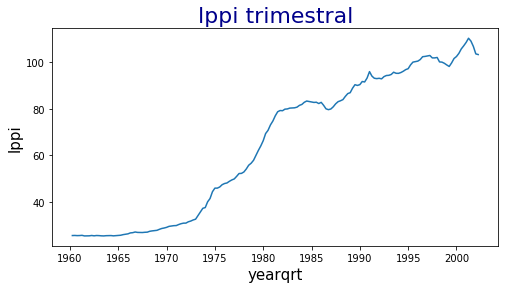

In [14]:
fig, ax = plt.subplots(figsize = (8, 4))
ax.set_title("lppi trimestral", fontsize = 22, 
             color = "darkblue")
ax.plot("ppi", data=timeseriesdata)
ax.set_xlabel("yearqrt", fontsize = 15)
ax.set_ylabel("lppi", fontsize = 15)
plt.show()

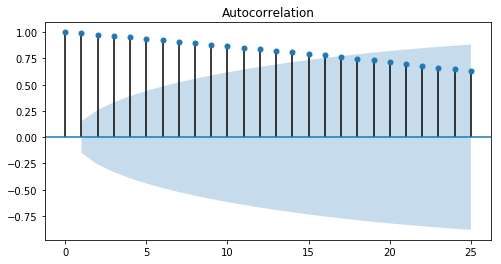

In [15]:
#identificación
fig, ax = plt.subplots(figsize = (8,4))
sm.graphics.tsa.plot_acf(timeseriesdata["ppi"], lags = 25, ax = ax)
plt.show()
#serie no estacionaria porque decrece lentamente y adicionalmente está por fuera de la región sombreada (bandas de barlet: rezagos no significactivos)

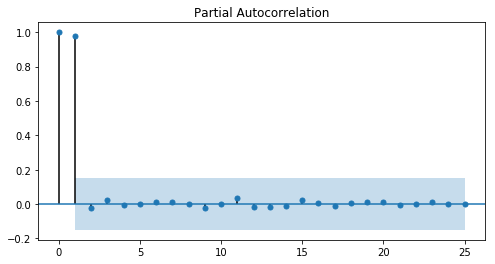

In [16]:
#punto 12. Falso, el rezago está por fuera de las bandas a partir del rezago 1
#identificación
fig, ax = plt.subplots(figsize = (8,4))
sm.graphics.tsa.plot_pacf(timeseriesdata["m3"], lags = 25, ax = ax)
plt.show()

In [17]:
#punto 13. una estimación bewteen arrojaría 545 observaciones empleadas.
data = pd.read_csv("Wooldridge14.csv")
#nr: dimensión temporal, year: dim temporal

In [19]:
data.head(20)

,nr,year,black,exper,hisp,hours,married,occ1,occ2,occ3,...,union,lwage,d81,d82,d83,d84,d85,d86,d87,expersq
0,13,1980,0,1,0,2672,0,0,0,0,...,0,1.197540,0,0,0,0,0,0,0,1
1,13,1981,0,2,0,2320,0,0,0,0,...,1,1.853060,1,0,0,0,0,0,0,4
2,13,1982,0,3,0,2940,0,0,0,0,...,0,1.344462,0,1,0,0,0,0,0,9
3,13,1983,0,4,0,2960,0,0,0,0,...,0,1.433213,0,0,1,0,0,0,0,16
4,13,1984,0,5,0,3071,0,0,0,0,...,0,1.568125,0,0,0,1,0,0,0,25
5,13,1985,0,6,0,2864,0,0,1,0,...,0,1.699891,0,0,0,0,1,0,0,36
6,13,1986,0,7,0,2994,0,0,1,0,...,0,-0.720263,0,0,0,0,0,1,0,49
7,13,1987,0,8,0,2640,0,0,1,0,...,0,1.669188,0,0,0,0,0,0,1,64
8,17,1980,0,4,0,2484,0,0,1,0,...,0,1.675962,0,0,0,0,0,0,0,16
9,17,1981,0,5,0,2804,0,0,1,0,...,0,1.518398,1,0,0,0,0,0,0,25


In [20]:
paneldata = data.set_index(["nr", "year"])

In [21]:
paneldata.head(20)

black  exper  hisp  hours  married  occ1  occ2  occ3  occ4  occ5  \
nr year                                                                     
13 1980      0      1     0   2672        0     0     0     0     0     0   
   1981      0      2     0   2320        0     0     0     0     0     0   
   1982      0      3     0   2940        0     0     0     0     0     0   
   1983      0      4     0   2960        0     0     0     0     0     0   
   1984      0      5     0   3071        0     0     0     0     0     1   
   1985      0      6     0   2864        0     0     1     0     0     0   
   1986      0      7     0   2994        0     0     1     0     0     0   
   1987      0      8     0   2640        0     0     1     0     0     0   
17 1980      0      4     0   2484        0     0     1     0     0     0   
   1981      0      5     0   2804        0     0     1     0     0     0   
   1982      0      6     0   2530        0     0     1     0     0     0   
   1983      0      7     0   2340        0     0     1     0     0     0   
   1984      0      8     0   2486        0     0     1     0     0     0   
   1985      0      9     0   2164        0     0     0     0     0     0   
   1986      0     10     0   2749        0     0     0     0     0     0   
   1987      0     11     0   2476        0     0     0     0     0     1   
18 1980      0      4     0   2332        1     0     0     0     1     0   
   1981      0      5     0   2116        1     0     0     0     1     0   
   1982      0      6     0   2500        1     0     1     0     0     0   
   1983      0      7     0   2474        1     0     0     1     0     0   

          ...     union     lwage  d81  d82  d83  d84  d85  d86  d87  expersq  
nr year   ...                                                                  
13 1980   ...         0  1.197540    0    0    0    0    0    0    0        1  
   1981   ...         1  1.853060    1    0    0    0    0    0    0        4  
   1982   ...         0  1.344462    0    1    0    0    0    0    0        9  
   1983   ...         0  1.433213    0    0    1    0    0    0    0       16  
   1984   ...         0  1.568125    0    0    0    1    0    0    0       25  
   1985   ...         0  1.699891    0    0    0    0    1    0    0       36  
   1986   ...         0 -0.720263    0    0    0    0    0    1    0       49  
   1987   ...         0  1.669188    0    0    0    0    0    0    1       64  
17 1980   ...         0  1.675962    0    0    0    0    0    0    0       16  
   1981   ...         0  1.518398    1    0    0    0    0    0    0       25  
   1982   ...         0  1.559191    0    1    0    0    0    0    0       36  
   1983   ...         0  1.725410    0    0    1    0    0    0    0       49  
   1984   ...         0  1.622022    0    0    0    1    0    0    0       64  
   1985   ...         0  1.608588    0    0    0    0    1    0    0       81  
   1986   ...         0  1.572385    0    0    0    0    0    1    0      100  
   1987   ...         0  1.820334    0    0    0    0    0    0    1      121  
18 1980   ...         0  1.515963    0    0    0    0    0    0    0       16  
   1981   ...         0  1.735379    1    0    0    0    0    0    0       25  
   1982   ...         0  1.631744    0    1    0    0    0    0    0       36  
   1983   ...         0  1.998229    0    0    1    0    0    0    0       49  

[20 rows x 25 columns]

In [22]:
paneldata.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 4360 entries, (13, 1980) to (12548, 1987)
Data columns (total 25 columns):
black      4360 non-null int64
exper      4360 non-null int64
hisp       4360 non-null int64
hours      4360 non-null int64
married    4360 non-null int64
occ1       4360 non-null int64
occ2       4360 non-null int64
occ3       4360 non-null int64
occ4       4360 non-null int64
occ5       4360 non-null int64
occ6       4360 non-null int64
occ7       4360 non-null int64
occ8       4360 non-null int64
occ9       4360 non-null int64
educ       4360 non-null int64
union      4360 non-null int64
lwage      4360 non-null float64
d81        4360 non-null int64
d82        4360 non-null int64
d83        4360 non-null int64
d84        4360 non-null int64
d85        4360 non-null int64
d86        4360 non-null int64
d87        4360 non-null int64
expersq    4360 non-null int64
dtypes: float64(1), int64(24)
memory usage: 868.8 KB


In [27]:
!pip install linearmodels
import linearmodels as lm

     |████████████████████████████████| 1.5MB 6.3MB/s eta 0:00:01
You should consider upgrading via the 'pip install --upgrade pip' command.


In [28]:
#minimos cuadrados agrupados
mco_agrupados = lm.PooledOLS(paneldata["lwage"], sm.add_constant(paneldata["lwage"])) #objeto modelo
results_mco_a = mco_agrupados.fit() #estimación de los parametros del objeto modelo
print(results_mco_a.summary)

                          PooledOLS Estimation Summary                          
Dep. Variable:                  lwage   R-squared:                        1.0000
Estimator:                  PooledOLS   R-squared (Between):              1.0000
No. Observations:                4360   R-squared (Within):               1.0000
Date:                Thu, May 14 2020   R-squared (Overall):              1.0000
Time:                        22:21:20   Log-likelihood                 1.474e+05
Cov. Estimator:            Unadjusted                                           
                                        F-statistic:                   4.815e+33
Entities:                         545   P-value                           0.0000
Avg Obs:                       8.0000   Distribution:                  F(1,4358)
Min Obs:                       8.0000                                           
Max Obs:                       8.0000   F-statistic (robust):          4.815e+33
                            

In [29]:
results_mco_a.entity_info

mean        8.0
median      8.0
max         8.0
min         8.0
total     545.0
Name: Observations per entity, dtype: float64

In [30]:
#estimado between
modelo_between = lm.BetweenOLS(paneldata["lwage"], sm.add_constant(paneldata["lwage"]))
results_between = modelo_between.fit()
print(results_between.summary)

                         BetweenOLS Estimation Summary                          
Dep. Variable:                  lwage   R-squared:                        1.0000
Estimator:                 BetweenOLS   R-squared (Between):              1.0000
No. Observations:                 545   R-squared (Within):               1.0000
Date:                Thu, May 14 2020   R-squared (Overall):              1.0000
Time:                        22:24:23   Log-likelihood                 1.879e+04
Cov. Estimator:            Unadjusted                                           
                                        F-statistic:                   1.237e+33
Entities:                         545   P-value                           0.0000
Avg Obs:                       8.0000   Distribution:                   F(1,543)
Min Obs:                       8.0000                                           
Max Obs:                       8.0000   F-statistic (robust):          1.237e+33
                            

In [31]:
results_between.entity_info

mean        8.0
median      8.0
max         8.0
min         8.0
total     545.0
Name: Observations per entity, dtype: float64

In [33]:
#Punto 14. VErdadera. R^2 0.1837 between > R^2 0.1774 within 
#efectos aleatorios. No hay probelmas con variables constantes. Resta una parte del prmedio a cada observación.
modelo_efectos_aleatorios = lm.RandomEffects(paneldata["lwage"], sm.add_constant(paneldata[["educ", "black", "hisp", "exper", "expersq","married", "union"]]))
resultados_efectos_aleatorios = modelo_efectos_aleatorios.fit()
print(resultados_efectos_aleatorios.summary)

                        RandomEffects Estimation Summary                        
Dep. Variable:                  lwage   R-squared:                        0.1782
Estimator:              RandomEffects   R-squared (Between):              0.1837
No. Observations:                4360   R-squared (Within):               0.1774
Date:                Thu, May 14 2020   R-squared (Overall):              0.1808
Time:                        22:30:37   Log-likelihood                   -1632.8
Cov. Estimator:            Unadjusted                                           
                                        F-statistic:                      134.85
Entities:                         545   P-value                           0.0000
Avg Obs:                       8.0000   Distribution:                  F(7,4352)
Min Obs:                       8.0000                                           
Max Obs:                       8.0000   F-statistic (robust):             134.85
                            